In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'BD6FPdatatraining.csv'
df = pd.read_csv(filename)

# 1=DB  2=SS   3=SW
# 4=A 5=I 7=B
flowpatterns_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00','#1B4F72','#2E86C1']

flowpatterns_labels = ['DB', 'SS', 'SW', 'A', 'I', 'B']

correct_FlowPattern_labels = df['FlowPattern'].values

In [2]:
df

,Samples,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID,FPLabels
0,1,3,0.40429,0.01677,0.001,0.00002,1000,1.8,0.07,-70.0,0.025,SW
1,2,3,0.63000,4.00000,0.001,0.00002,1000,1.8,0.07,-5.0,0.051,SW
2,3,5,4.00000,0.63000,0.001,0.00002,1000,1.8,0.07,5.0,0.051,I
3,4,4,0.41059,10.31910,0.001,0.00002,1000,1.8,0.07,-80.0,0.025,A
4,5,5,0.00250,2.50000,0.001,0.00002,1000,1.8,0.07,5.0,0.051,I
...,...,...,...,...,...,...,...,...,...,...,...,...
4535,4536,5,0.10000,1.00000,0.001,0.00002,1000,1.8,0.07,5.0,0.025,I
4536,4537,5,0.68984,0.02148,0.001,0.00002,1000,1.8,0.07,-90.0,0.025,I
4537,4538,4,0.00991,38.49360,0.001,0.00002,1000,1.8,0.07,50.0,0.025,A
4538,4539,5,0.09809,0.03961,0.001,0.00002,1000,1.8,0.07,70.0,0.025,I


In [3]:
def make_flowpatterns_log_plot(logs, flowpatterns_colors):
    #make sure logs are sorted by samples
    logs = logs.sort_values(by='Samples')
    cmap_flowpatterns = colors.ListedColormap(
            flowpatterns_colors[0:len(flowpatterns_colors)], 'indexed')
        
    ztop=logs.Samples.min(); zbot=logs.Samples.max()
                                              
    cluster=np.repeat(np.expand_dims(logs['FlowPattern'].values,1), 100, 1)
                                              
    f, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 30))
    ax[0].plot(logs.Vsl, logs.Samples, '-', color='blue')
    ax[1].plot(logs.Vsg, logs.Samples, '-', color='green')
    ax[2].plot(logs.VisL, logs.Samples, '-', color='red')
    ax[3].plot(logs.VisG, logs.Samples, '-', color='cyan')
    ax[4].plot(logs.DenL, logs.Samples, '-', color='black')
    ax[5].plot(logs.DenG, logs.Samples, '-', color='magenta')
    ax[6].plot(logs.ST, logs.Samples, '-', color='yellow')
    ax[7].plot(logs.Ang, logs.Samples, '-', color='purple')
    ax[8].plot(logs.ID, logs.Samples, '-', color='violet')
    im=ax[9].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_flowpatterns,vmin=1,vmax=7)
                                              
    divider = make_axes_locatable(ax[9])
    cax = divider.append_axes("right", size="15%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((80*' ').join([' DB ', 'SS', 'SW',
                                'A', ' I ', ' B ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
                                              
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=1)
                                                          
    ax[0].set_xlabel("Vsl")
    ax[0].set_xlim(logs.Vsl.min(),logs.Vsl.max())
    ax[1].set_xlabel("Vsg")
    ax[1].set_xlim(logs.Vsg.min(),logs.Vsg.max())
    ax[2].set_xlabel("VisL")
    ax[2].set_xlim(logs.VisL.min(),logs.VisL.max())
    ax[3].set_xlabel("VisG")
    ax[3].set_xlim(logs.VisG.min(),logs.VisG.max())
    ax[4].set_xlabel("DenL")
    ax[4].set_xlim(logs.DenL.min(),logs.DenL.max())
    ax[5].set_xlabel("DenG")
    ax[5].set_xlim(logs.DenG.min(),logs.DenG.max())
    ax[6].set_xlabel("ST")
    ax[6].set_xlim(logs.ST.min(),logs.ST.max())
    ax[7].set_xlabel("Ang")
    ax[7].set_xlim(logs.Ang.min(),logs.Ang.max())
    ax[8].set_xlabel("ID")
    ax[8].set_xlim(logs.ID.min(),logs.ID.max())
    ax[9].set_xlabel('FPLabels')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([]); ax[8].set_yticklabels([]); ax[9].set_yticklabels([])
    ax[9].set_xticklabels([])

/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_16775/147862031.py:42: UserWarning: Attempting to set identical left == right == 0.001 results in singular transformations; automatically expanding.
  ax[2].set_xlim(logs.VisL.min(),logs.VisL.max())
/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_16775/147862031.py:44: UserWarning: Attempting to set identical left == right == 2e-05 results in singular transformations; automatically expanding.
  ax[3].set_xlim(logs.VisG.min(),logs.VisG.max())
/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_16775/147862031.py:46: UserWarning: Attempting to set identical left == right == 1000 results in singular transformations; automatically expanding.
  ax[4].set_xlim(logs.DenL.min(),logs.DenL.max())
/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_16775/147862031.py:48: UserWarning: Attempting to set identical left == right == 1.8 results in singular transformations; automatically expanding.
  ax[5].set_xlim(logs

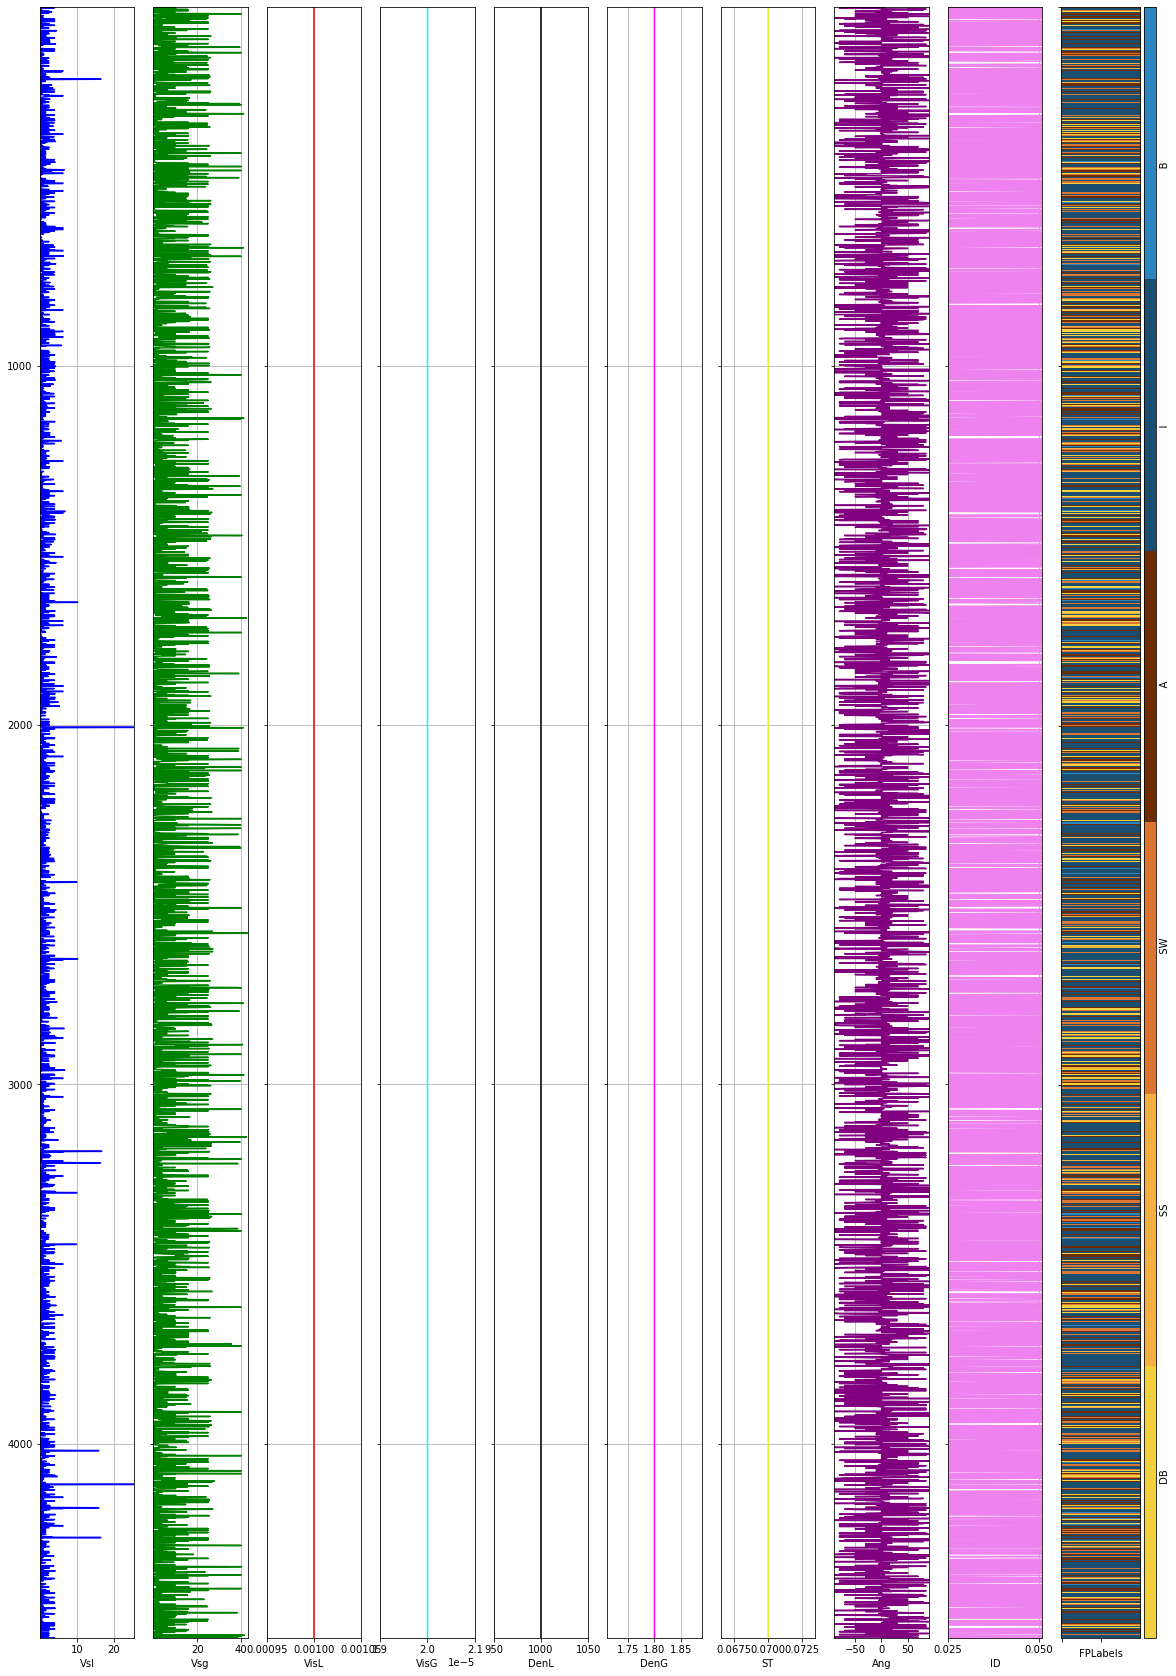

In [4]:
make_flowpatterns_log_plot(df,flowpatterns_colors)

DB     492
SS     113
SW     686
A      833
I     2312
B      104
Name: FlowPattern, dtype: int64

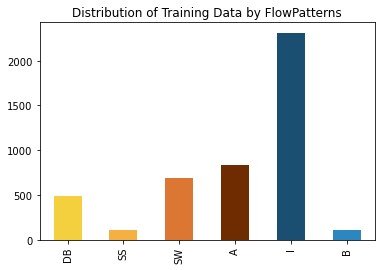

In [5]:
#count the number of unique entries for each flowpatterns, sort them by
#flowpatterns (instead of by number of entries)
flowpatterns_counts = df['FlowPattern'].value_counts().sort_index()
#use facies labels to index each count
flowpatterns_counts.index = flowpatterns_labels

flowpatterns_counts.plot(kind='bar',color=flowpatterns_colors,
                         title='Distribution of Training Data by FlowPatterns')
flowpatterns_counts

In [6]:
#feature_vectors = df.drop(['Samples', 'FlowPattern', 'FPLabels'], axis=1)
#feature_vectors.describe()

df = df.drop(['Samples', 'FlowPattern'], axis=1)
df.describe()

,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,4540.000000,4540.000000,4.540000e+03,4.540000e+03,4540.0,4.540000e+03,4.540000e+03,4540.000000,4540.000000
mean,0.922429,6.135065,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.744659,0.038653
std,1.481942,8.671270,3.296338e-17,1.419784e-18,0.0,1.281338e-13,5.399054e-15,46.584475,0.012985
min,0.001100,0.003730,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,0.016000,0.160000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


In [7]:
df["FPLabels"].value_counts()

I     2312
A      833
SW     686
DB     492
SS     113
B      104
Name: FPLabels, dtype: int64

# How to try imbalance data

1. Up-sample Minority Class
Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

There are several heuristics for doing so, but the most common way is to simply resample with replacement.

First, we'll import the resampling module from Scikit-Learn:

Next, we'll create a new DataFrame with an up-sampled minority class. Here are the steps:

First, we'll separate observations from each class into different DataFrames.
Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [8]:
from sklearn.utils import resample
#Upsampling all the minorities classes to the equal
#value of the majority class i.e. sample ='2905'

df_class1 = resample(df[df['FPLabels']=='I'],
               replace=True,
               n_samples=2312,
               random_state=123)

df_class2 = resample(df[df['FPLabels']=='A'],
               replace=True,
               n_samples=2312,
               random_state=123)

df_class3 = resample(df[df['FPLabels']=='SW'],
               replace=True,
               n_samples=2312,
               random_state=123)

df_class4 = resample(df[df['FPLabels']=='DB'],
               replace=True,
               n_samples=2312,
               random_state=123)

df_class5 = resample(df[df['FPLabels']=='SS'],
               replace=True,
               n_samples=2312,
               random_state=123)

df_class6 = resample(df[df['FPLabels']=='B'],
               replace=True,
               n_samples=2312,
               random_state=123)


df_upsampled = pd.concat([df_class1, df_class2, df_class3, df_class4, df_class5, df_class6])


# Display new class counts

df_upsampled.FPLabels.value_counts()

I     2312
A     2312
SW    2312
DB    2312
SS    2312
B     2312
Name: FPLabels, dtype: int64

In [9]:
features = df_upsampled.columns[:9] 
X = df_upsampled[features].values
labels = df.columns[-1]
y = df_upsampled[labels].values

In [10]:
print(f'Feature Columns: {", ".join(features)}\nLabel Column: {labels}')

Feature Columns: Vsl, Vsg, VisL, VisG, DenL, DenG, ST, Ang, ID
Label Column: FPLabels


In [11]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
scaled_features = scaler.transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, y, test_size=0.2, random_state=42)

In [12]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X_train,y_train)

predicted_labels = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell,)
    for label in labels:
        print ("%{0}s".format(columnwidth) % label,)
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1,)
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell,)
        print

conf = confusion_matrix(y_test, predicted_labels)

In [13]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('FP classification accuracy = %f' % accuracy(conf))

FP classification accuracy = 0.858739


In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

Accuracy: 0.8587387387387387
F1 score: 0.8530815256742288
Recall: 0.8587387387387387
Precision: 0.8625767433330154

 clasification report:
               precision    recall  f1-score   support

           A       0.88      0.90      0.89       477
           B       0.93      1.00      0.97       457
          DB       0.91      0.91      0.91       450
           I       0.89      0.58      0.70       469
          SS       0.78      0.99      0.87       466
          SW       0.78      0.77      0.78       456

    accuracy                           0.86      2775
   macro avg       0.86      0.86      0.85      2775
weighted avg       0.86      0.86      0.85      2775


 confussion matrix:
 [[429   0   0   4   0  44]
 [  0 457   0   0   0   0]
 [  0   0 411  30   4   5]
 [ 25  33  39 273  56  43]
 [  0   0   0   0 460   6]
 [ 35   0   2   0  66 353]]


In [ ]:
do_model_selection = True

if do_model_selection:
    C_range = np.array([.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000])
    gamma_range = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10])
    
    fig, axes = plt.subplots(3, 2,
                             sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0

    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):

            clf = svm.SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_train,y_train)

            train_conf = confusion_matrix(y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(y_test, clf.predict(X_test))
            
            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)
        
        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([0.2,1])

    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)
        
    fig.text(0.04, 0.5, 'Classification Accuracy', va='center',
                      rotation='vertical', fontsize=14)

In [15]:
clf = svm.SVC(C=1000, gamma=10)
clf.fit(X_train, y_train)

cv_conf = confusion_matrix(y_test, clf.predict(X_test))

print('Optimized Flow Pattern classification accuracy = %.2f' % accuracy(cv_conf))

Optimized Flow Pattern classification accuracy = 0.98


In [16]:
predicted_labels_rbf = clf.predict(X_test)

conf_rbf = confusion_matrix(y_test, predicted_labels_rbf)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels_rbf))
print ('F1 score:', f1_score(y_test, predicted_labels_rbf,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels_rbf,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels_rbf,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels_rbf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels_rbf))

Accuracy: 0.9837837837837838
F1 score: 0.9837488297401135
Recall: 0.9837837837837838
Precision: 0.9838184215359322

 clasification report:
               precision    recall  f1-score   support

           A       0.97      0.98      0.98       477
           B       1.00      1.00      1.00       457
          DB       0.98      0.99      0.98       450
           I       0.98      0.96      0.97       469
          SS       0.99      1.00      0.99       466
          SW       0.99      0.97      0.98       456

    accuracy                           0.98      2775
   macro avg       0.98      0.98      0.98      2775
weighted avg       0.98      0.98      0.98      2775


 confussion matrix:
 [[469   0   0   3   0   5]
 [  0 457   0   0   0   0]
 [  0   0 446   4   0   0]
 [ 10   0   8 451   0   0]
 [  0   0   0   0 466   0]
 [  4   0   2   3   6 441]]
